In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Load dataset
df = pd.read_csv('../data/Employee_Attrition.csv', sep=';', index_col='id', na_values='#N/D')
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [4]:
# Check for missing values
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

In [5]:
# Drop unnecessary columns
df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


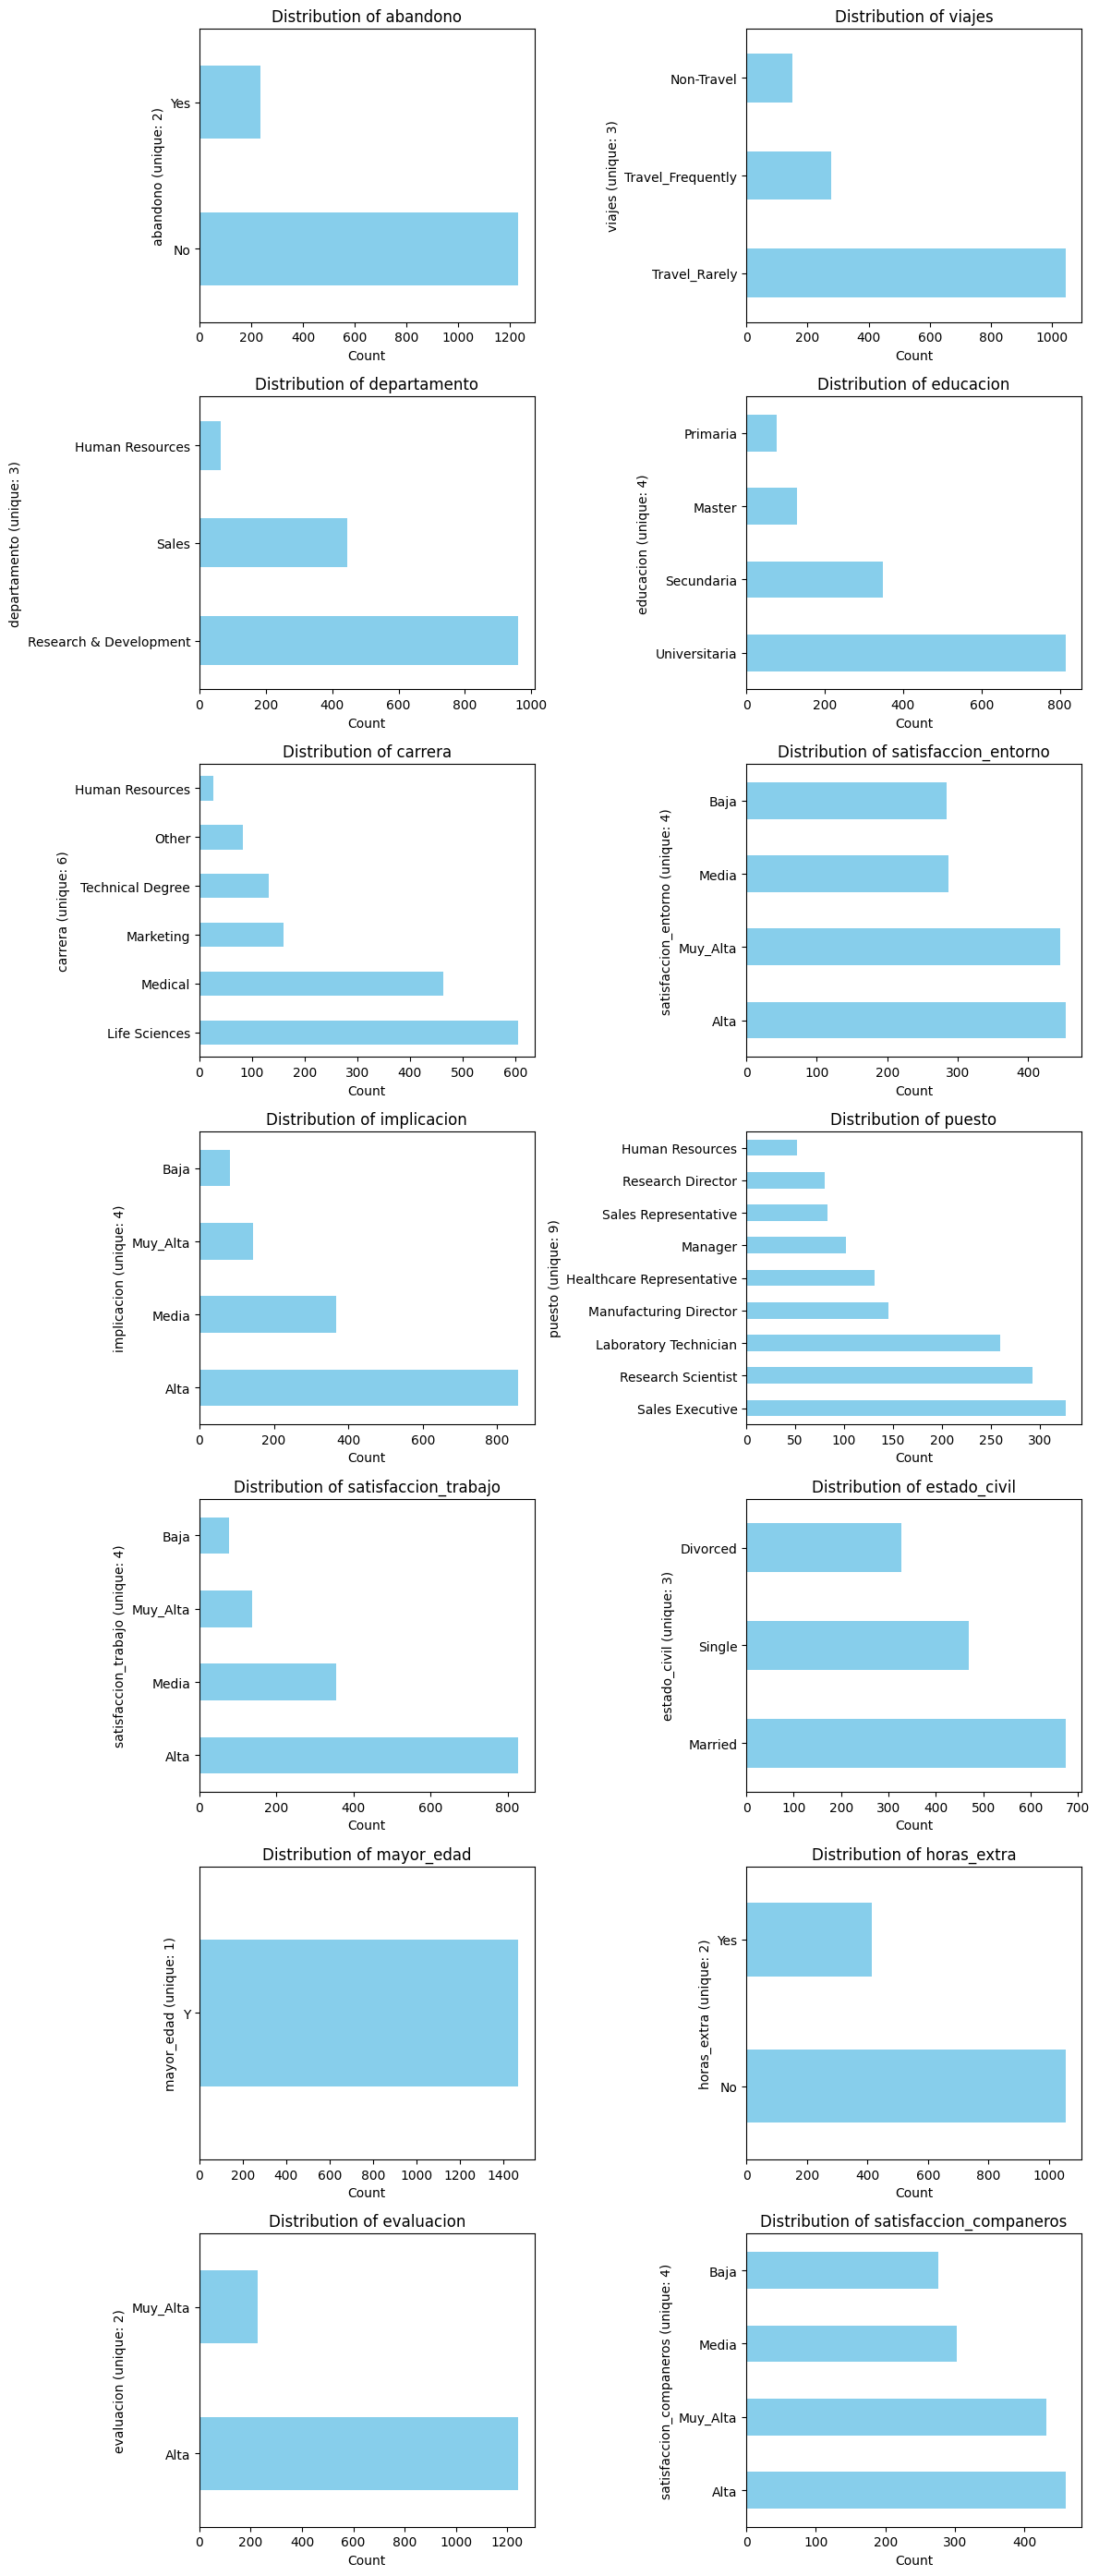

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create subplots for categorical data distribution
num_plots = len(categorical_columns)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(12, num_plots * 2))
axes = axes.flatten()

# Plot distributions for each categorical variable
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    counts.plot(kind='barh', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel(f'{column} (unique: {df[column].nunique()})')
    axes[i].set_xlabel('Count')

# Remove empty axes if the number of plots is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

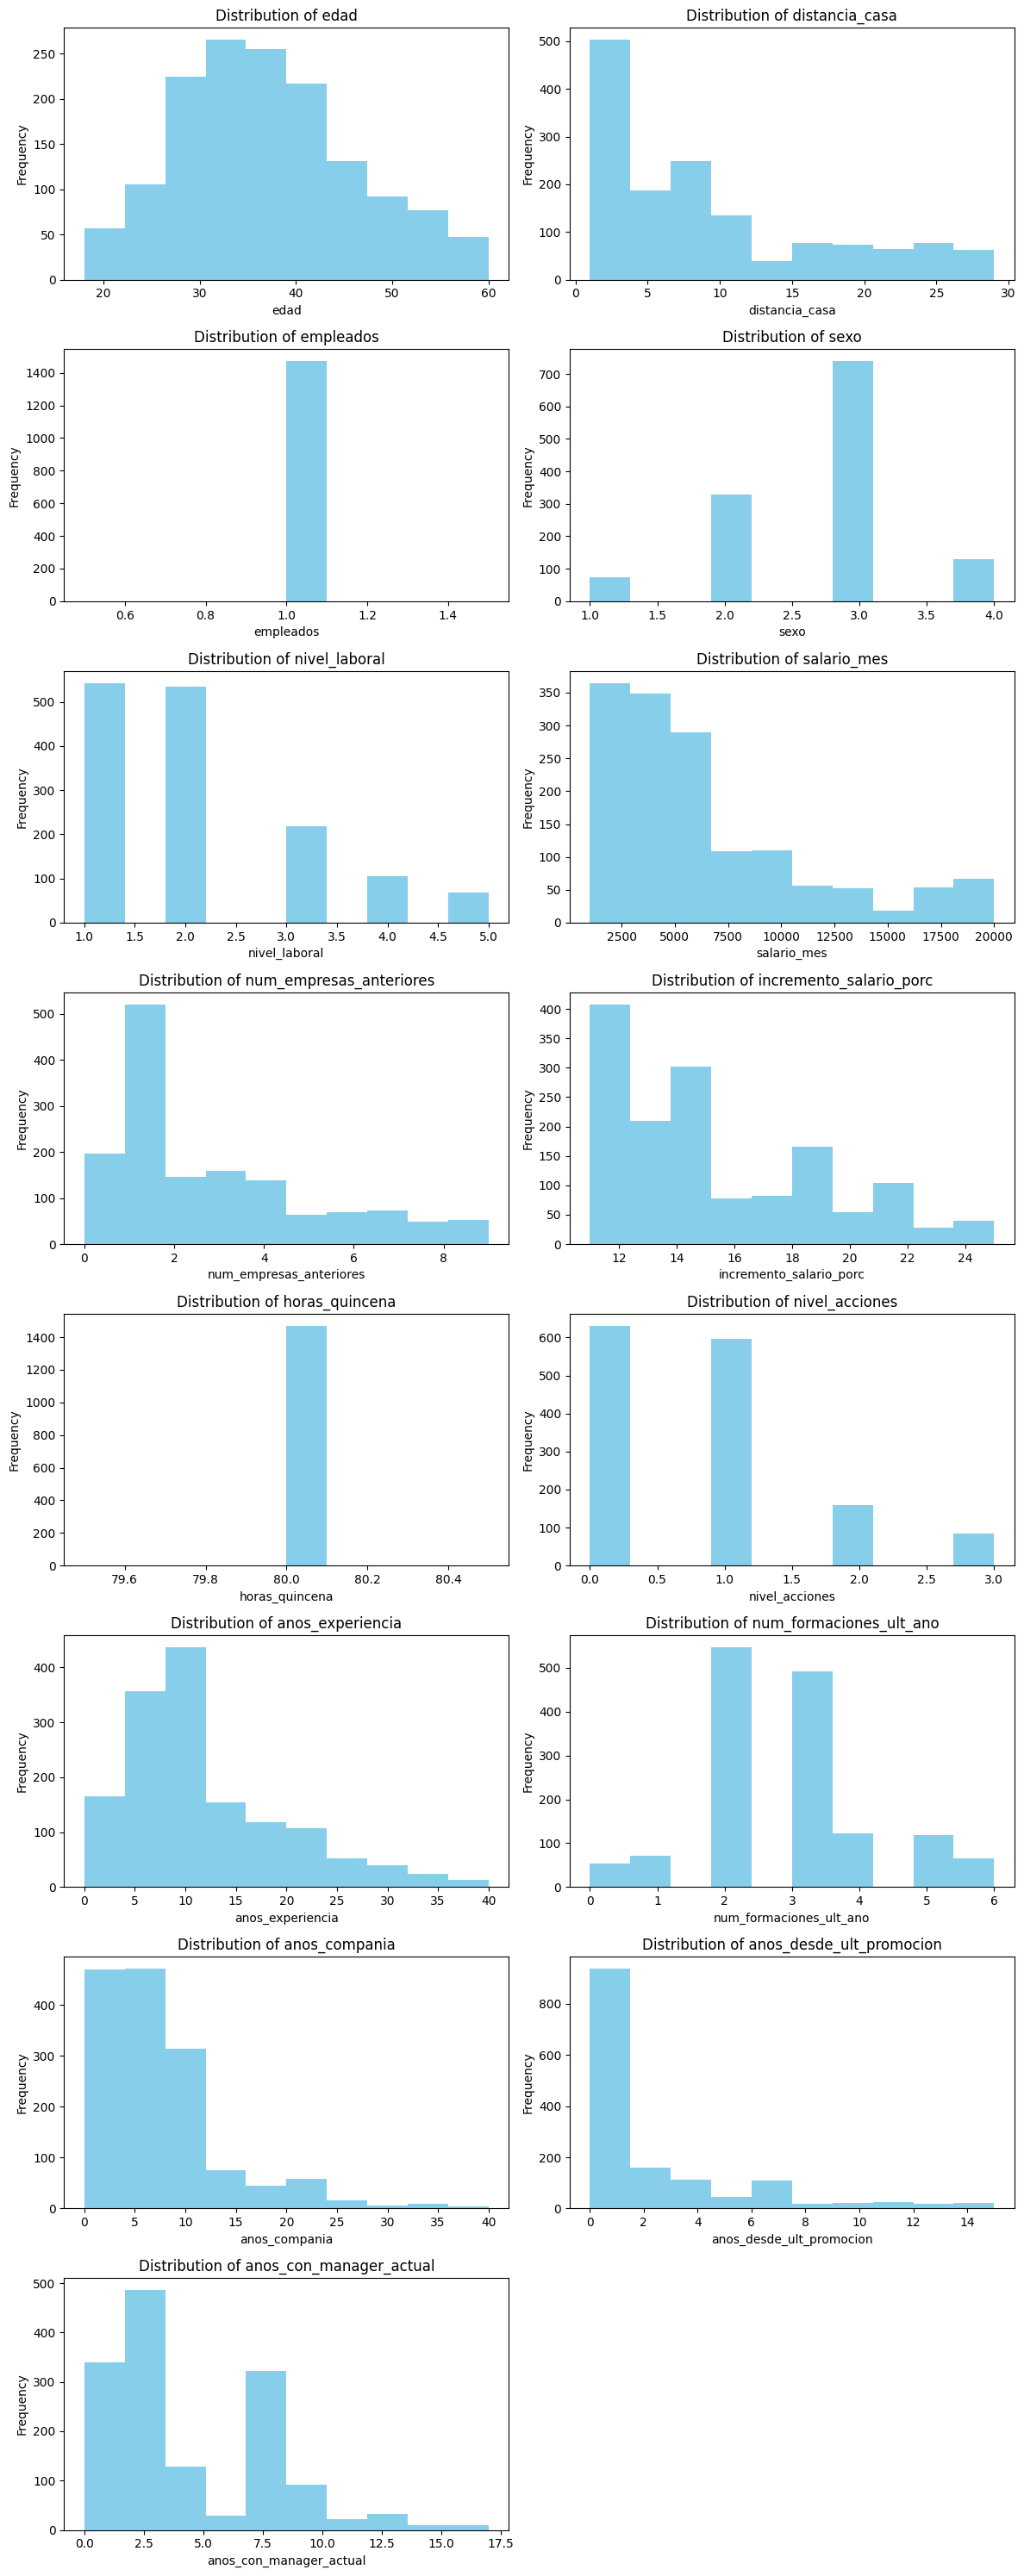

In [7]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create subplots for numeric data distribution
fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(12, len(numeric_columns) * 2))
axes = axes.flatten()

# Plot histograms for each numeric variable
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=10, color='skyblue')  # Plot histogram with 10 bins
    axes[i].set_title(f'Distribution of {column}')  # Set plot title
    axes[i].set_xlabel(column)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label

# Remove empty axes if we have an odd number of plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [8]:
# Drop more unnecessary columns
df.drop(columns=['horas_quincena', 'sexo', 'empleados'], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


In [9]:
# Dropout rate
df.abandono.value_counts(normalize=True)*100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [10]:
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

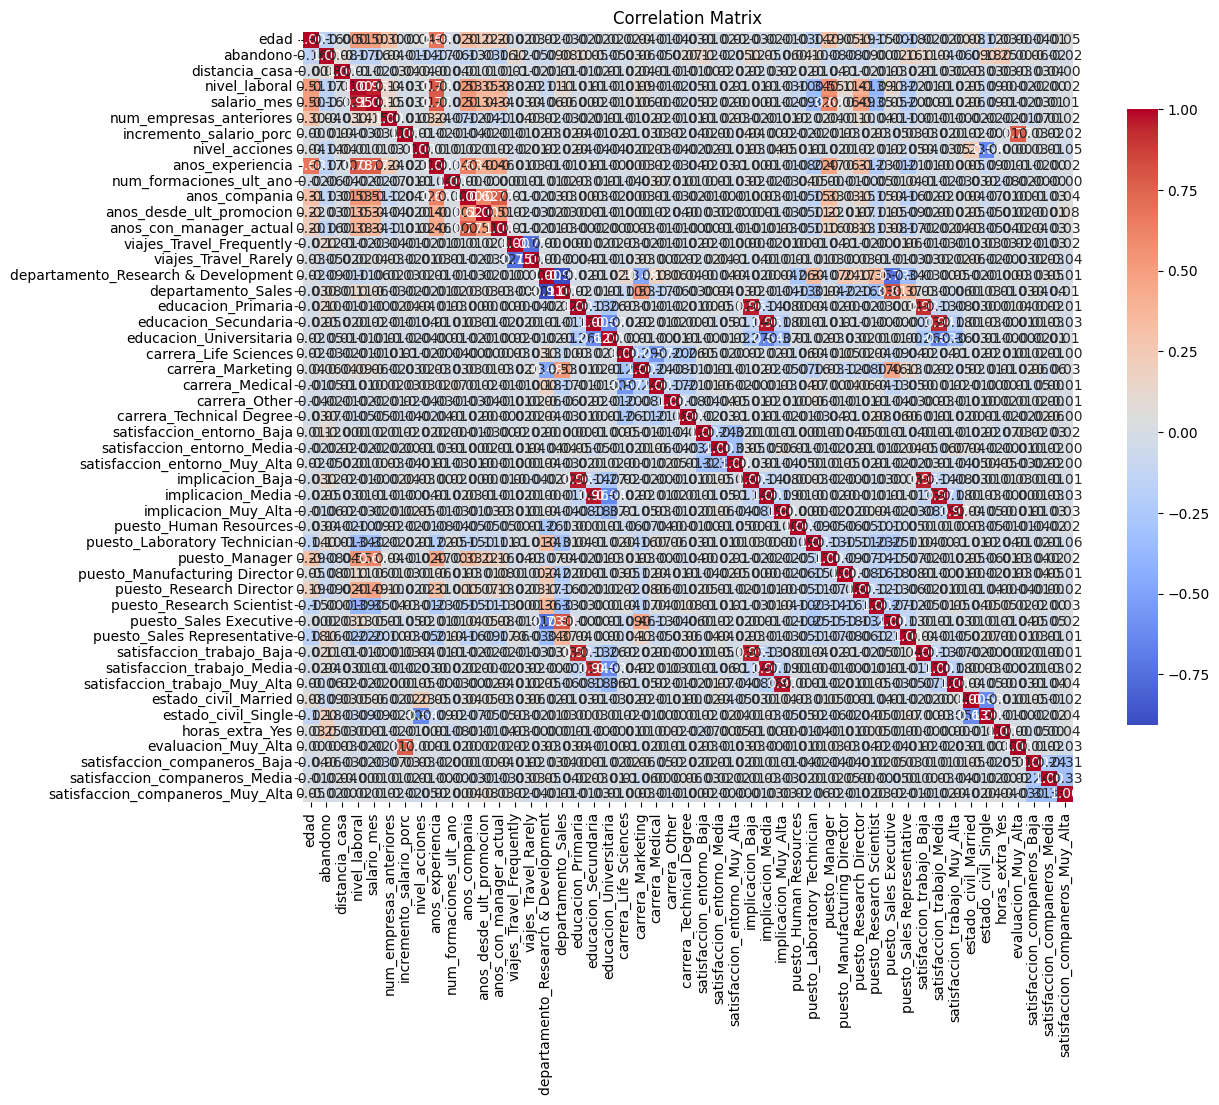

In [11]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # 'drop_first' avoids multicollinearity

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Display heatmap of correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

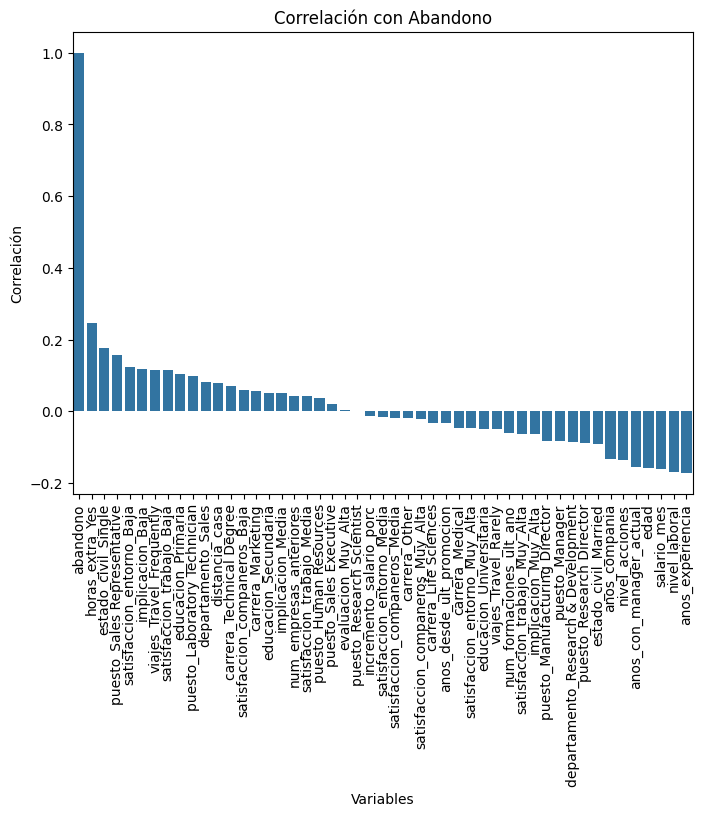

In [12]:
# Show correlation with attrition
correlation_with_abandon = correlation_matrix['abandono'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_abandon.index, y=correlation_with_abandon.values)
plt.title('Correlación con Abandono')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

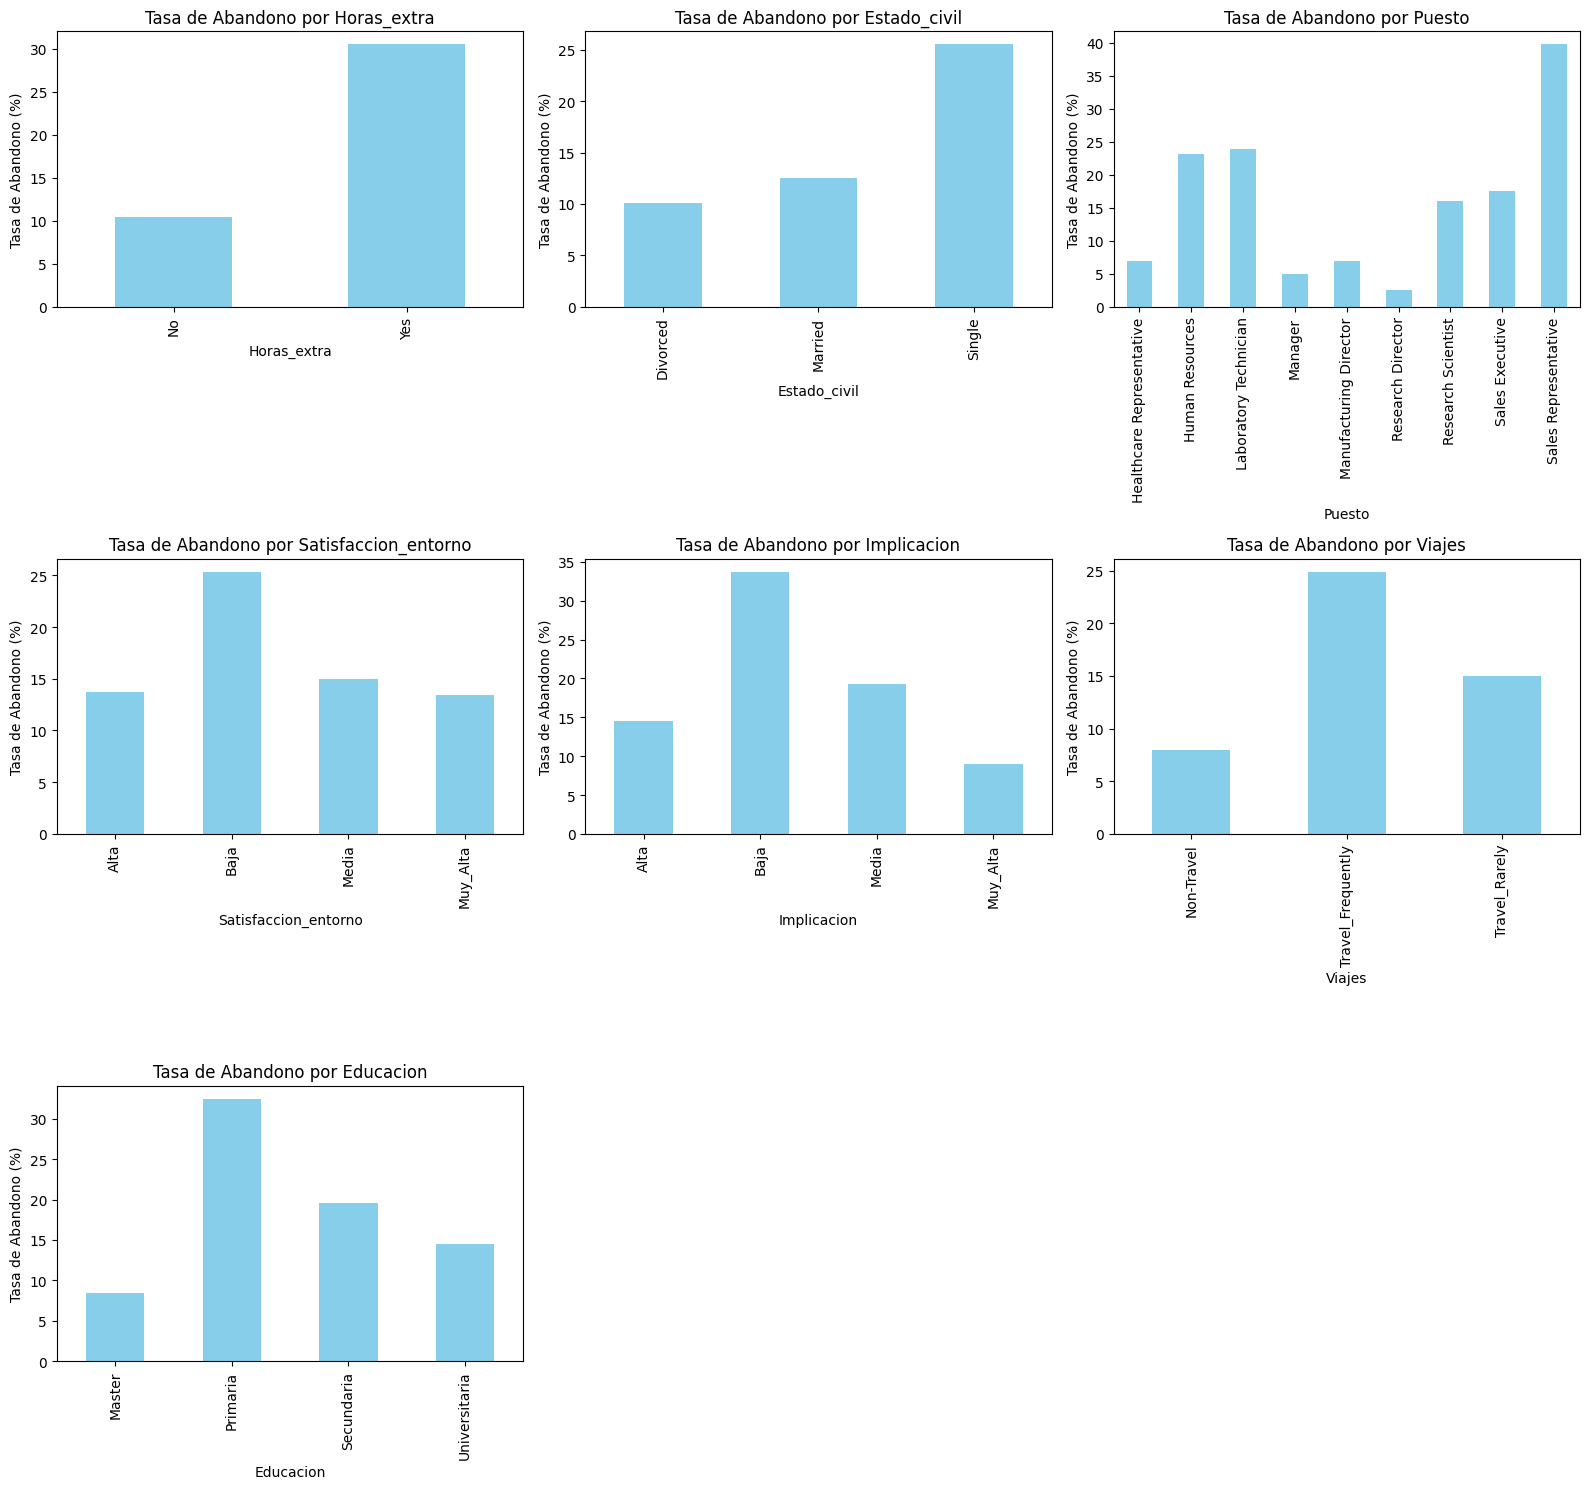

In [13]:
# Select top variables for analysis
top_variables = [
    'horas_extra',
    'estado_civil',
    'puesto',
    'satisfaccion_entorno',
    'implicacion',
    'viajes',
    'educacion'
]

# Create subplots for abandonment rate by top variables
cols = 3 
rows = (len(top_variables) + cols - 1) // cols
plt.figure(figsize=(16, 5 * rows))  

for i, var in enumerate(top_variables):
    plt.subplot(rows, cols, i + 1)  # Create dynamic subplot

    # Calculate mean attrition rate for each category of the variable
    abandonment_rate = df.groupby(var)['abandono'].mean() * 100  # Multiply by 100 for percentage
    
    # Plot
    abandonment_rate.plot.bar(color='skyblue')
    
    # Set title and labels
    plt.title(f'Tasa de Abandono por {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Tasa de Abandono (%)')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#### Perfil medio de empleado con alta tasa de abandono
- Trabaja horas extra
- Es soltero
- Trabaja en area Sales Representative
- Satisfacción de entorno baja
- Implicación baja
- Viajan frecuentemente
- Tienen grados de estudios inferiores

In [14]:
# Create annual salary column
df['salario_ano'] = df['salario_mes'].transform(lambda x: x*12)
df.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,11,Alta,Baja,0,8,0,6,0,5,71916
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,15,Alta,Media,0,7,3,0,0,0,25080
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,11,Alta,Alta,0,8,3,8,3,0,34908
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,12,Alta,Muy_Alta,1,6,3,2,2,2,41616


Según el estudio "Cost of Turnover" del Center for American Progress:

El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [15]:
# Define conditions for abandonment impact based on salary
conditions = [(df['salario_ano'] <= 30000),
             (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
             (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
             (df['salario_ano'] > 75000)]

# Define corresponding results for each condition
results = [df.salario_ano * 0.161,
          df.salario_ano * 0.197,
          df.salario_ano * 0.204,
          df.salario_ano * 0.21]

# Create new column for abandonment impact
df['impacto_abandono'] = np.select(conditions, results, default=-999)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [16]:
# Calculate total cost of attrition
total_cost = df.loc[df.abandono == 1].impacto_abandono.sum()
total_cost

np.float64(2719005.912)

In [17]:
# Calculate cost of attrition for low engagement employees
cost_engagement_low = df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()
cost_engagement_low

np.float64(368672.688)

In [18]:
# Print potential savings from reducing attrition
print(f"Reducing employee attrition by 10% would save {int(total_cost * 0.1)}$ annually.")
print(f"Reducing employee attrition by 20% would save {int(total_cost * 0.2)}$ annually.")
print(f"Reducing employee attrition by 30% would save {int(total_cost * 0.3)}$ annually.")

Reducing employee attrition by 10% would save 271900$ annually.
Reducing employee attrition by 20% would save 543801$ annually.
Reducing employee attrition by 30% would save 815701$ annually.


In [19]:
# Calculate past attrition rate for Sales Representatives
past_sales_representatives = len(df.loc[df.puesto == 'Sales Representative'])
attrition_sales_representatives = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
past_attrition_rate = attrition_sales_representatives / past_sales_representatives

past_attrition_rate

0.39759036144578314

In [20]:
# Calculate current attrition for Sales Representatives
current_sales_representatives = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
current_attrition = int(past_attrition_rate * current_sales_representatives)

current_attrition

19

### ML MODEL

In [21]:
# Prepare data for machine learning model
df_ml = df.copy()
df_ml

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [22]:
# One-hot encode categorical variables for ML
cat_ohe = pd.get_dummies(df_ml.select_dtypes('O'), drop_first=False).reset_index(drop=True)
cat_ohe = cat_ohe.astype(int)
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Single,mayor_edad_Y,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0,0,1,0,0,1,0,0,0,1,...,1,1,0,1,1,0,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,1,0,...,1,1,0,1,1,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
1466,0,0,1,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
1467,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1468,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1


In [23]:
# Select numeric columns
num = df.select_dtypes('number').reset_index(drop=True)

# Concatenate one-hot encoded categorical and numeric columns
df_ml = pd.concat([cat_ohe, num], axis=1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0,0,1,0,0,1,0,0,0,1,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0,1,0,0,1,0,0,0,1,0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0,0,1,0,1,0,0,0,1,0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0,1,0,0,1,0,0,0,0,1,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0,0,1,0,1,0,0,0,0,1,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,1,0,0,0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0,0,1,0,1,0,0,0,1,0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0,0,1,0,1,0,1,0,0,0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0,1,0,0,0,1,0,0,1,0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [24]:
# Define features and target variable
X = df_ml.drop(columns='abandono')
y = df_ml['abandono']

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=4)
decision_tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4)

In [25]:
# Predict probabilities for the test set
predictions = decision_tree_model.predict_proba(test_X)[:, 1]
predictions[:20]

array([0.92592593, 0.1015625 , 0.1015625 , 0.04828974, 0.04828974,
       0.04828974, 0.14634146, 0.08823529, 0.08823529, 0.04828974,
       0.04828974, 0.04828974, 0.08823529, 0.08823529, 0.68421053,
       0.1015625 , 0.23636364, 0.375     , 0.1015625 , 0.04828974])

In [26]:
# Calculate ROC AUC score
roc_auc_score(test_y, predictions)

np.float64(0.7351730418943534)

In [27]:
# Add scoring to the original dataframe
df['attrition_score'] = decision_tree_model.predict_proba(df_ml.drop(columns='abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,attrition_score
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.146341
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048290
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.257143
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.500000
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.048290
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.048290
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.088235


In [28]:
# Sort dataframe by attrition score
df.sort_values(by='attrition_score', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,attrition_score
id,,,,,,,,,,,,,,,,,,,,,
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,Baja,Media,1,...,Baja,0,1,2,1,0,0,34356,6768.132,1.0
1842,31,1,Travel_Rarely,Human Resources,18,Master,Human Resources,Muy_Alta,Muy_Alta,1,...,Alta,0,2,4,1,0,0,35472,6987.984,1.0
1865,29,0,Travel_Rarely,Human Resources,6,Secundaria,Medical,Muy_Alta,Media,1,...,Muy_Alta,0,1,3,1,0,0,33648,6628.656,1.0
1684,23,1,Travel_Rarely,Research & Development,8,Secundaria,Medical,Muy_Alta,Media,1,...,Baja,0,5,2,5,1,2,47868,9429.996,1.0
1714,24,1,Travel_Rarely,Human Resources,22,Primaria,Human Resources,Muy_Alta,Baja,1,...,Alta,1,1,2,1,0,0,18660,3004.260,1.0
55,26,1,Travel_Rarely,Research & Development,25,NaN,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.0
1752,29,1,Travel_Rarely,Sales,9,Primaria,Marketing,Media,Baja,1,...,Alta,0,2,3,2,2,2,33120,6524.640,1.0
566,19,1,Travel_Rarely,Human Resources,2,Secundaria,Technical Degree,Baja,Media,1,...,Alta,0,1,3,1,0,0,30768,6061.296,1.0
926,22,1,Travel_Rarely,Research & Development,3,Universitaria,Life Sciences,Media,Alta,2,...,Baja,1,4,3,3,0,2,50052,10210.608,1.0


In [29]:
# Import additional classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

# List of models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, use_label_encoder=False),
    'Logistic Regression': LogisticRegression(solver='liblinear')
}

# Initialize variable to store predictions
xgboost_probabilities = None

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(test_y, y_pred)}")
    print(f"Precision: {precision_score(test_y, y_pred)}")
    print(f"Recall: {recall_score(test_y, y_pred)}")
    print(f"F1 Score: {f1_score(test_y, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(test_y, model.predict_proba(test_X)[:, 1])}")  # AUC with model predictions
    print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
    print("\n")
    
    # Save XGBoost predictions
    if model_name == 'XGBoost':
        xgboost_probabilities = model.predict_proba(df_ml.drop(columns='abandono'))[:, 1]

# Add XGBoost probabilities to the original dataframe
df['xgboost_attrition_probability'] = xgboost_probabilities

# Display the updated dataframe with the new probabilities
df.head()


Decision Tree:
Accuracy: 0.8412698412698413
Precision: 0.5714285714285714
Recall: 0.26666666666666666
F1 Score: 0.36363636363636365
ROC AUC: 0.734535519125683
Confusion Matrix:
 [[351  15]
 [ 55  20]]


Random Forest:
Accuracy: 0.8435374149659864
Precision: 0.7142857142857143
Recall: 0.13333333333333333
F1 Score: 0.2247191011235955
ROC AUC: 0.8004735883424408
Confusion Matrix:
 [[362   4]
 [ 65  10]]


XGBoost:
Accuracy: 0.8707482993197279
Precision: 0.725
Recall: 0.38666666666666666
F1 Score: 0.5043478260869565
ROC AUC: 0.7827322404371584
Confusion Matrix:
 [[355  11]
 [ 46  29]]


Logistic Regression:
Accuracy: 0.8299319727891157
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.7134790528233151
Confusion Matrix:
 [[366   0]
 [ 75   0]]




c:\Users\52562\OneDrive\Escritorio\Retención Empleados\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\52562\OneDrive\Escritorio\Retención Empleados\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,attrition_score,xgboost_attrition_probability
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,8,0,6,0,5,71916,14670.864,0.146341,0.674716
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,61560,12558.240,0.048290,0.038815
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,7,3,0,0,0,25080,4037.880,0.257143,0.909449
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,34908,6876.876,0.500000,0.163802
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,41616,8198.352,0.375000,0.240135


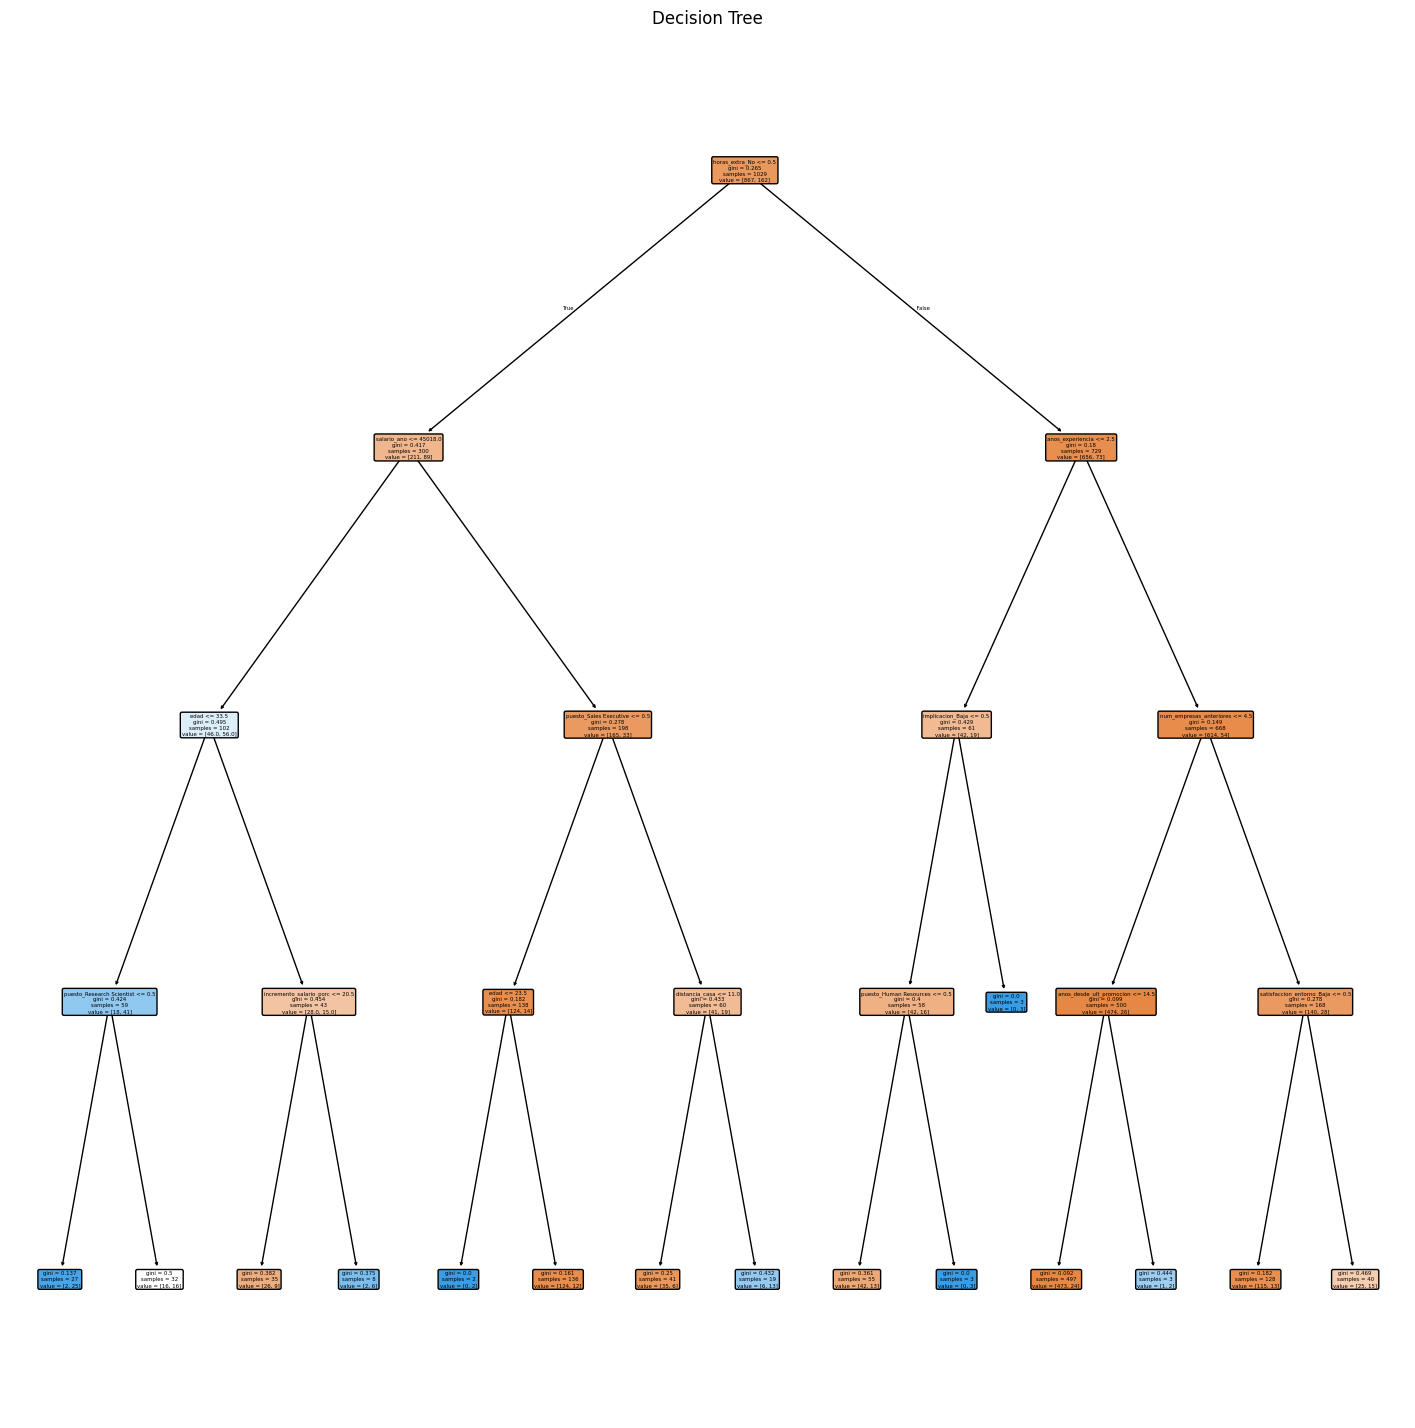

In [30]:
# Visualize Decision Tree
plt.figure(figsize=(18, 18))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree")
plt.show()

In [31]:
# Sort dataframe by xgboost_attrition_probability
df.sort_values(by='xgboost_attrition_probability', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,attrition_score,xgboost_attrition_probability
id,,,,,,,,,,,,,,,,,,,,,
478,21,1,Travel_Frequently,Sales,1,Secundaria,Technical Degree,Baja,Media,1,...,0,3,3,3,1,2,26088,4200.168,0.925926,0.993621
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,0,1,4,1,1,0,13416,2159.976,0.925926,0.991768
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,Alta,1,...,0,0,2,0,0,0,18828,3031.308,0.925926,0.984904
1077,20,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,Alta,1,...,0,2,3,2,0,2,27876,4488.036,0.925926,0.984337
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,Alta,1,...,0,0,3,0,0,0,22536,3628.296,0.925926,0.984035
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,0,1,3,1,0,0,25452,4097.772,0.925926,0.984017
137,20,1,Travel_Frequently,Research & Development,6,Secundaria,Life Sciences,Muy_Alta,Media,1,...,0,1,5,1,1,0,35112,6917.064,0.925926,0.971113
2021,21,0,Travel_Rarely,Sales,5,Universitaria,Medical,Alta,Alta,1,...,0,2,6,2,1,2,28560,4598.160,0.925926,0.968957
1783,22,1,Travel_Rarely,Research & Development,8,Universitaria,Medical,Alta,Alta,1,...,0,1,6,1,0,0,28776,4632.936,0.925926,0.968088


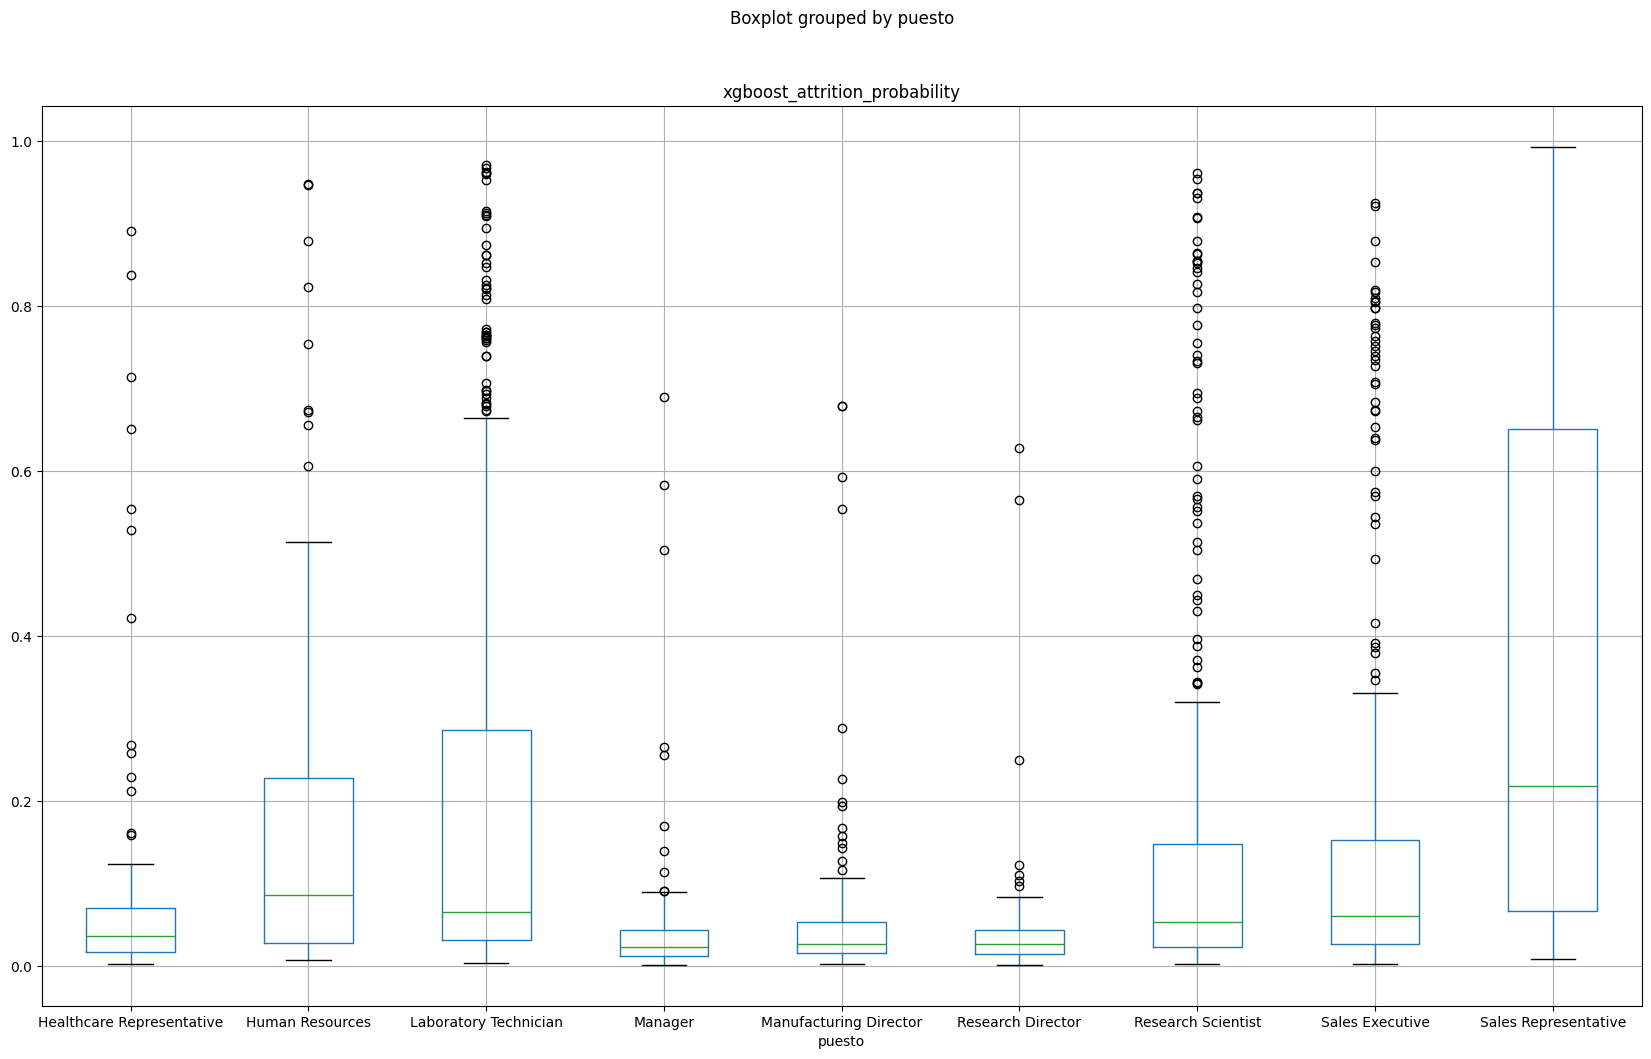

In [32]:
df.boxplot(column='xgboost_attrition_probability', by='puesto', figsize = (20,12));

In [33]:
df.to_excel('../data/df_scoring_es.xlsx', index=True, engine='openpyxl')